ASTR 201 HW 1: Emily Broadbent

In [336]:
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.constants import c,h,k_B, R_sun, L_sun,R_jup, R_earth, sigma_sb, G,M_earth
import matplotlib.pyplot as plt
from scipy import integrate

*All constants, unit conversions, and numerical values (mass, radius, distances of the sun, earth, Jupiter etc.) are from AstroPy.units or Astropy.constants unless otherwise noted. 

Problems 2.5-2.7 in this notebook are supplement to the OverLeaf PDF. Here I show my calculations that acompany the equations discussed in the PDF

# Problem 2.5

In [337]:
#convert Jupiter's distance 
D_sj = (5.2*u.au).to(u.m) #jupiter's distance https://www.jpl.nasa.gov/_edu/pdfs/scaless_reference.pdf

In [340]:
#Calculate the thermal flux of the Sun at Jupiter's orbital distance
t= ((L_sun)/(4*np.pi*(D_sj)**2))
print("Thermal flux of the Sun at Jupiter's orbital distance:", t.round())

Thermal flux of the Sun at Jupiter's orbital distance: 50.0 W / m2


# Problem 2.6

In [341]:
#Calculate the thermal flux of Jupiter
t=sigma_sb*(165*u.K)**4        # jupiter's temp: https://science.nasa.gov/resource/solar-system-temperatures/

In [342]:
print("Thermal flux of Jupiter:", t.round())

Thermal flux of Jupiter: 42.0 W / m2


# 2.7a

In [345]:
#calculate mass of 1m^3 cube of rock
m_other= 2.65*(u.g/u.cm**3)*u.m**3      #density of rock https://www.britannica.com/science/rock-geology/Physical-properties

#calculate force of gravity
F_g = (G*M_earth*m_other)/(R_earth**2)
F_g

<Quantity 25.96575505 g m4 / (cm3 s2)>

In [346]:
m_other.decompose()

<Quantity 2650. kg>

In [347]:
a= 7.6*10**(-15)*(u.erg/((u.cm**3)*u.K**4))  #radiation constant- from textbook and lecture
#calculate surface area of cube that sunlight/radiation hits
s_area= 1*u.m**2
#calculate force of pressure from cube
F_p= (1/3)*a*s_area
F_p

<Quantity 2.53333333e-15 erg m2 / (cm3 K4)>

In [348]:
#find temp for the limit of radiation pressure to exceed surface gravity
T=(F_g/F_p)**(1/4)
T

<Quantity 10061.83415105 g(1/4) K m(1/2) / (erg(1/4) s(1/2))>

In [349]:
T.decompose()

<Quantity 100618.3415105 K>

# 2.7 b

In [350]:
#find radius's of spheres to determine volume
r1=600*u.km + R_earth           #end of the thermosphere
r2=18*u.km + R_earth           #end of the troposphere 
                                #https://www.noaa.gov/jetstream/atmosphere/layers-of-atmosphere#:~:text=Thermosphere,one%20descends%20toward%20the%20Earth.

V_air = (4*np.pi)*(r1**3 - r2**3)    # density of air https://www.earthdata.nasa.gov/topics/atmosphere/air-mass-density#:~:text=Pure%2C%20dry%20air%20has%20a,a%20pressure%20of%20101.325%20kPa.
#calcualte mass of atmosphere
m_other= 1.3*(u.kg/u.cm**3)*V_air
#find force of gravity
F_g = (G*M_earth*m_other)/(R_earth**2)
F_g


<Quantity 1.25055336e+13 kg km3 m / (cm3 s2)>

In [351]:
m_other.decompose()

<Quantity 1.27628347e+27 kg>

In [352]:
F_g.decompose()

<Quantity 1.25055336e+28 kg m / s2>

In [353]:
a= 7.6*10**(-15)*(u.erg/((u.cm**3)*u.K**4))   #radiation constant- from textbook and lecture
#calculate surface area of atmosphere
s_area= 4*np.pi*r1**2
#find Pressure force from atmoshpere
F_p= (1/3)*a*s_area
F_p

<Quantity 1.55016019e-06 erg km2 / (cm3 K4)>

In [354]:
#find temp for the limit of radiation pressure to exceed surface gravity
T=(F_g/F_p)**(1/4)
T

<Quantity 53294.37973068 K kg(1/4) km(1/4) m(1/4) / (erg(1/4) s(1/2))>

In [355]:
T.decompose()

<Quantity 16853162.64348596 K>

# Promblem 3 A

In [38]:
#calculates and returns the intensity
#lamb: array of wavelengths in log space
#T: Temperature of object
def B_lambda(lamb, T):
    intensity = ((2*h*c**2)/lamb**5)/((np.e**(h*c/((lamb*k_B*T)))-1))
    return intensity

In [39]:
#create array of wavelengths in log space
lambda_log_sampling= np.logspace(-1, 2, num=3000, base=10) * u.micron


In [148]:
#calculates and returns the flux density
#lamb_arr: array of wavelengths in log space
#T_obj: Temperature of object
#distance: observation distance
#R_obj: radius of object
def flux_density(lamb_arr,T_obj, distance, R_obj):
    intensity = B_lambda(lambda_log_sampling,T_obj)
    flux_density = intensity *(R_obj/distance)**2
    return flux_density.to(u.erg/u.s/u.cm**3)

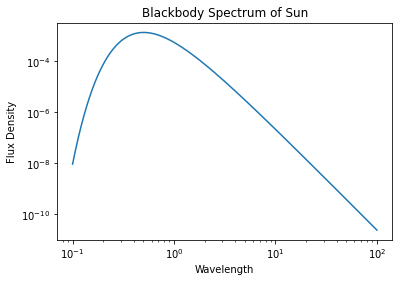

In [43]:
#defines numerical values and plots the Blackbody Spectrum of Sun

T_sun = 5778*u.K       #https://www.pveducation.org/pvcdrom/properties-of-sunlight/the-sun#:~:text=For%20simplicity%2C%20the%206000%20K%20spectrum%20is,when%20classifying%20the%20sun%20as%20a%20star.
T_obj = T_sun
distance = 10*u.pc
R_obj = R_sun
lamb_arr = lambda_log_sampling

x = lamb_arr
y = flux_density(lamb_arr,T_obj, distance, R_obj)

plt.loglog(x, y) 
plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)') 
plt.title('Blackbody Spectrum of Sun') 
plt.show() 


# Problem 3 B

In [ ]:
#Sun-like star with M5 dwarf companion

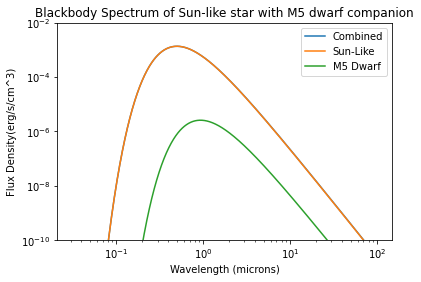

In [418]:
#plots the blackbody radiation for a sun-like star with M5 dwarf companion, individually and combined

T_sun = 5778*u.K
T_M5 = 3100*u.K        # Cifuentes et.al 2020 https://arxiv.org/pdf/2007.15077
R_sun = R_sun
R_M5 = 0.207 * R_sun   # Cifuentes et.al 2020 https://arxiv.org/pdf/2007.15077

T_obj1 = T_sun
T_obj2 = T_M5

distance = 10*u.pc

R_obj1 = R_sun
R_obj2 = R_M5

lambda_log_sampling= np.logspace(-1.5, 2, num=1000, base=10) * u.micron
lamb_arr = lambda_log_sampling

flux_1 = flux_density(lamb_arr,T_obj1, distance, R_obj1)
flux_2 = flux_density(lamb_arr,T_obj2, distance, R_obj2)

x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

x = lamb_arr
y = flux_1
plt.loglog(x, y, label='Sun-Like')

x = lamb_arr
y = flux_2
plt.loglog(x, y, label='M5 Dwarf')

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)') 
plt.title('Blackbody Spectrum of Sun-like star with M5 dwarf companion')
plt.ylim(10**(-10), 10**(-2))
plt.legend(loc='best')
plt.show() 


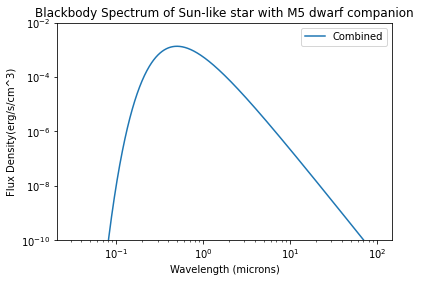

In [419]:
x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)') 
plt.title('Blackbody Spectrum of Sun-like star with M5 dwarf companion')
plt.ylim(10**(-10), 10**(-2))
plt.legend(loc='best')
plt.show() 

From the figure above, the sun-like star dominates the spectrum. The sun-like star nearly exactly overlaps with the combined spectrum. If only looking at the combined spectra, you would not be able to identify a companion

In [420]:
#M5 dwarf with 10,000K WD companion 

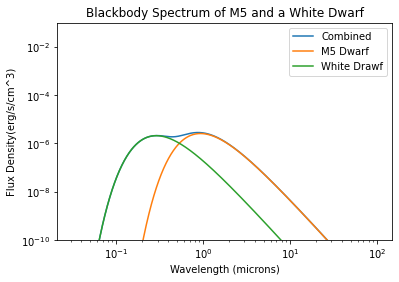

In [421]:
#plots the blackbody radiation for a M5 dwarf with 10,000K WD companion, individually and combined

T_M5 = 3100*u.K        # Cifuentes et.al 2020 https://arxiv.org/pdf/2007.15077
T_wd = 10000*u.K        #given
R_M5 = 0.207 * R_sun    # Cifuentes et.al 2020 https://arxiv.org/pdf/2007.15077
R_wd = 0.01 * R_sun    #shipman 1978 https://articles.adsabs.harvard.edu/pdf/1979ApJ...228..240S

T_obj1 = T_M5
T_obj2 = T_wd

distance = 10*u.pc

R_obj1 = R_M5
R_obj2 = R_wd

lambda_log_sampling= np.logspace(-1.5, 2, num=1000, base=10) * u.micron
lamb_arr = lambda_log_sampling

flux_1 = flux_density(lamb_arr,T_obj1, distance, R_obj1)
flux_2 = flux_density(lamb_arr,T_obj2, distance, R_obj2)

x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

x = lamb_arr
y = flux_1
plt.loglog(x, y, label='M5 Dwarf')

x = lamb_arr
y = flux_2
plt.loglog(x, y, label='White Drawf')

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)')
plt.title('Blackbody Spectrum of M5 and a White Dwarf')
plt.ylim(10**(-10), 10**(-1))
plt.legend(loc='best')
plt.show() 


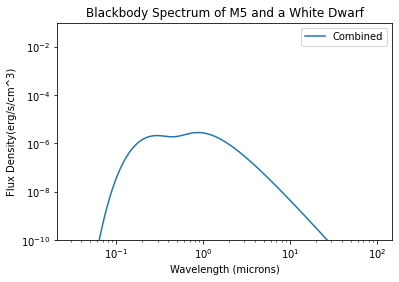

In [422]:
x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)')
plt.title('Blackbody Spectrum of M5 and a White Dwarf')
plt.ylim(10**(-10), 10**(-1))
plt.legend(loc='best')
plt.show()

From the figure above, the combined spectra does signify a companion. The combined spectra is not smooth (has a bump), which suggets both objects are contributing. However, this is a very small bump, and would be hard to identify.

In [423]:
#Arcturus with 1,000,000 K Neutron Star

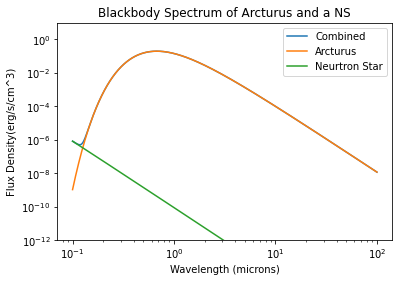

In [424]:
#plots the blackbody radiation for Arcturus with 1,000,000 K Neutron Starcompanion, individually and combined
T_arc = 4286*u.K        #Ramirez and Prieto 2011 https://arxiv.org/pdf/1109.4425
T_ns = 1_000_000*u.K    #given
R_arc = 25.4 * R_sun    #Ramirez and Prieto 2011 https://arxiv.org/pdf/1109.4425
R_ns = 10 *u.km        #Known fact/ learned from previous classes

T_obj1 = T_arc
T_obj2 = T_ns

distance = 10*u.pc

R_obj1 = R_arc
R_obj2 = R_ns

lambda_log_sampling= np.logspace(-1, 2, num=1000, base=10) * u.micron
lamb_arr = lambda_log_sampling

flux_1 = flux_density(lamb_arr,T_obj1, distance, R_obj1)
flux_2 = flux_density(lamb_arr,T_obj2, distance, R_obj2)

x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

x = lamb_arr
y = flux_1
plt.loglog(x, y, label='Arcturus')

x = lamb_arr
y = flux_2
plt.loglog(x, y, label='Neurtron Star')

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)')
plt.title('Blackbody Spectrum of Arcturus and a NS')
plt.ylim(10**(-12), 10**1)
plt.legend(loc='best')
plt.show() 


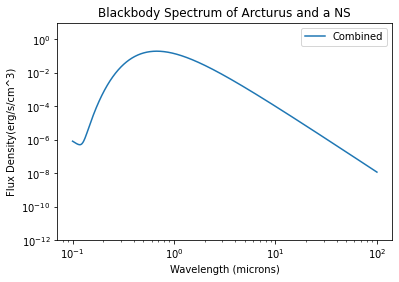

In [425]:
x = lamb_arr
y = flux_1 + flux_2
plt.loglog(x, y, label='Combined') 

plt.xlabel('Wavelength (microns)') 
plt.ylabel('Flux Density(erg/s/cm^3)')
plt.title('Blackbody Spectrum of Arcturus and a NS')
plt.ylim(10**(-12), 10**1)
plt.legend(loc='best')
plt.show() 

In the figure above, the combined spectra mostly follows the orange line (Arcturus), but on the far left, you can see an up turn between the orange and green. the combined spectra then follows the green line to the left. If the graph/wavelength extended more to the left, you should be able to see the contributions from both Arcturus and the neutron star, but could also be hard to identify.

# Problem 3 c

See OverLeaf PDF

# Problem 3 d

In [426]:
# define given values with NO units (for integration)
T_eff = 3000 
R_star = ((5*R_sun).cgs).value
R_c = ((100*u.au).cgs).value
dist = 1

In [427]:
# calcualtes and returns the intensity
#v: frequency
# T: effective temperature (given)
def B_lambda(v, T):
    intensity = ((2*(h.cgs).value*v**3)/(c.cgs).value**2)/((np.e**((h.cgs).value*v/(((k_B.cgs).value*T)))-1))
    return intensity

#calcualtes and returns the flux density
#v: frequency
def flux_density(v):
    T_obj = 3000 
    intensity = B_lambda(v,T_obj)
    flux_density = intensity
    return flux_density

In [428]:
#defines the integrand from equation 3 of the homework(without the integral symbol) - needed to integrate
#v: frequency
def intgd(v): 
    R_star = ((5*R_sun).cgs).value
    R_c = ((100*u.au).cgs).value 
    x = flux_density(v)*((R_star/R_c)**2)*(1-np.e**(-(v/3e14)))
    return x

In [429]:
#integrates the integral and calcualtes equation 3 form the homework
#finds numerical value of F_abs
F_abs = integrate.quad(intgd,0,1e18)  #using np.inf created an error, so I chose a large number instead
F_abs

<ipython-input-427-70de6d0b1cab>:5: RuntimeWarning: overflow encountered in double_scalars
  intensity = ((2*(h.cgs).value*v**3)/(c.cgs).value**2)/((np.e**((h.cgs).value*v/(((k_B.cgs).value*T)))-1))


(40.56965817123023, 1.2755960320139093e-09)

In [430]:
#calculate the temperature of the cloud
T_c = (F_abs[0]/(2*((sigma_sb.cgs).value)))**(1/4)
print('Answer')
print("Temperature of the cloud:",T_c.round(),"K")

Answer
Temperature of the cloud: 24.0 K


# 3 e

In [431]:
#define values
T_eff = 3000*u.K
T_c = 24*u.K
R_star = ((5*R_sun).cgs)
R_c = ((100*u.au).cgs)
dist = 10*u.pc
#t_v= v/(1*u.micron)

In [432]:
#calculates and returns intensity
#lamb: array of wavelengths
#T: temperature of object
def B_lambda(lamb, T):
    intensity = ((2*h*c**2)/lamb**5)/((np.e**(h*c/((lamb*k_B*T)))-1))
    return intensity

In [433]:
# creates array of wavelengths in log space
lamb_arr= np.logspace(-1, 2, num=3000, base=10) * u.micron


In [434]:
#calculates and returns the flux density
#lamb_arr: array of wavelengths in log space
#T_obj: Temperature of object
#distance: observation distance
#R_obj: radius of object
def flux_density(lamb_arr,T_obj, distance, R_obj):
    intensity = B_lambda(lambda_log_sampling,T_obj)
    flux_density = intensity *(R_obj/distance)**2
    return flux_density.to(u.erg/u.s/u.cm**3)

In [435]:
#calculate the blackbody spectrum of the star 
I_v = flux_density(lamb_arr, T_eff, dist,R_star)
I_v

<Quantity [2.24688961e-17, 3.02058906e-17, 4.05146927e-17, 5.42189703e-17,
           7.23959980e-17, 9.64515373e-17, 1.28215853e-16, 1.70066549e-16,
           2.25085367e-16, 2.97257863e-16, 3.91727138e-16, 5.15115521e-16,
           6.75931495e-16, 8.85083331e-16, 1.15652596e-15, 1.50807393e-15,
           1.96242074e-15, 2.54841442e-15, 3.30265006e-15, 4.27145412e-15,
           5.51335138e-15, 7.10212568e-15, 9.13060947e-15, 1.17153657e-14,
           1.50024605e-14, 1.91745663e-14, 2.44596836e-14, 3.11418293e-14,
           3.95741083e-14, 5.01946678e-14, 6.35461308e-14, 8.02992220e-14,
           1.01281433e-13, 1.27511733e-13, 1.60242522e-13, 2.01010235e-13,
           2.51696264e-13, 3.14600170e-13, 3.92527487e-13, 4.88894830e-13,
           6.07855489e-13, 7.54449208e-13, 9.34780497e-13, 1.15623049e-12,
           1.42770824e-12, 1.75994818e-12, 2.16586174e-12, 2.66095197e-12,
           3.26380193e-12, 3.99664858e-12, 4.88605628e-12, 5.96370554e-12,
           7.26731524e-12

In [436]:
#calculate the blackbody spectrum of the cloud
S_v = flux_density(lamb_arr, T_c, dist,R_c)
S_v

/Users/emilybroadbent/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:486: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
           0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        

In [437]:
#calculates and returns the full radiative transfer equation (combined)
#I_v: blackbody spectrum of the star
#S_v: blackbody spectrum of the cloud
#lamb_arr: array of wavelengths
def I_comb(I_v, S_v, lamb_arr):
    t_v= lamb_arr/(1*u.micron)
    I_comb = I_v*np.e**(-t_v) + S_v*(1-np.e**(-t_v))
    return  I_comb

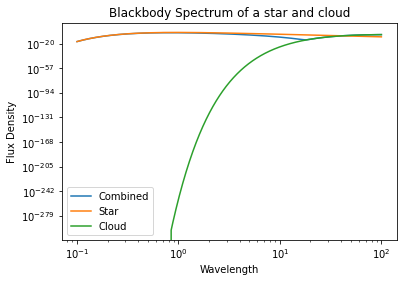

In [438]:
#graphs individual and combined blackbody spectrums
distance = 10*u.pc  #given

R_obj1 = R_star
R_obj2 = R_c

lambda_log_sampling= np.logspace(-1, 2, num=1000, base=10) * u.micron
lamb_arr = lambda_log_sampling

flux_1 = I_v
flux_2 = S_v
flux_comb = I_comb(I_v, S_v, lamb_arr)

x = lamb_arr
y = flux_comb
plt.loglog(x, y, label='Combined') 

x = lamb_arr
y = flux_1
plt.loglog(x, y, label='Star')

x = lamb_arr
y = flux_2
plt.loglog(x, y, label='Cloud')

plt.xlabel('Wavelength') 
plt.ylabel('Flux Density') 
plt.title('Blackbody Spectrum of a star and cloud')
plt.legend(loc='best')
plt.show()

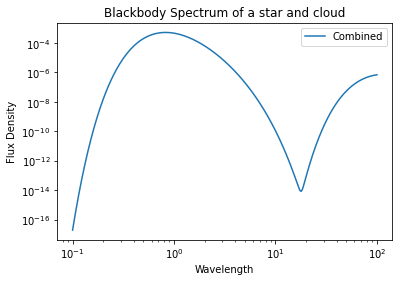

In [439]:
x = lamb_arr
y = flux_comb
plt.loglog(x, y, label='Combined')

plt.xlabel('Wavelength') 
plt.ylabel('Flux Density') 
plt.title('Blackbody Spectrum of a star and cloud')
plt.legend(loc='best')
plt.show()

In the figure above, I clearly see both the spectra for the star and the cloud in the combined spectra. It should be much easier to identify a companion here than in 3.b